In [151]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from scipy.io import wavfile
import io
from PIL import Image
   
test_file = '/home/george/Documents/george_vae/testing/Y9_44818.40200373_9_14_11_10_0.wav'

In [152]:
# create sonogram of the whole song 
 
# wav to numpy array
def wav_to_numpy(file):
    rate, data = wavfile.read(file)
    return rate, data

def createSonogram(songfile):
    data = wav_to_numpy(songfile)
    rate = data[0]
    data = data[1]

    f, t, Sxx = signal.spectrogram(data, rate, nfft=512, noverlap=25, scaling="density")

    fmin = 400 # Hz
    fmax = 8000 # Hz
    freq_slice = np.where((f >= fmin) & (f <= fmax))

    # keep only frequencies of interest
    f   = f[freq_slice]
    Sxx = Sxx[freq_slice,:][0]

    Sxx = np.log(Sxx + 1)

    np_sonogram = np.array(Sxx, dtype="float32")

    # figure size in inches 1,1
    # plt.figure(figsize=(300,5))


    # plt.pcolormesh(Sxx)
    # plt.axis('off')
    return plt, np_sonogram 

# np sonogram is the numpy array of the sonogram
plt, np_sonogram = createSonogram(test_file)

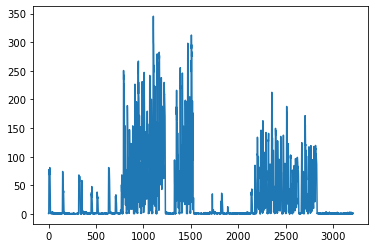

In [153]:
# reverse the axis of the np array dim1 becomes dim 0 and vice versa
np_sonogram = np_sonogram.T

vertical_sum = np.sum(np_sonogram, axis=1)

# x axis is the time axis
plt.plot(vertical_sum) 

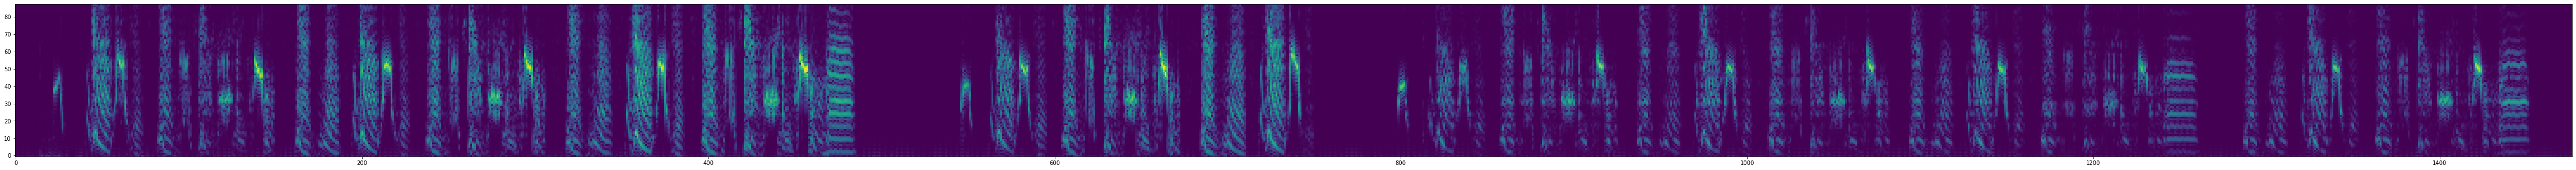

In [154]:
from matplotlib.pyplot import axis 

window_size = 100
threshold = 20

# window slides over vertical sum, takes the average and keeps it if it is above threshold
def sliding_window_average(vertical_sum, window_size, threshold):
    window = np.ones(int(window_size))/float(window_size)
    y = np.convolve(vertical_sum, window, 'same')
    y = np.where(y > threshold, y, 0)
    return y

y = sliding_window_average(vertical_sum, window_size, threshold)

# get the indices of the locations where the vertical sum is above threshold
indices = np.where(y > 0)[0]
plt.figure(figsize=(300,5))
plt.imshow(np_sonogram[indices].T, origin='lower')
